<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


*   Identify duplicate values in the dataset.

*   Remove duplicate values from the dataset.

*   Identify missing values in the dataset.

*   Impute the missing values in the dataset.

*   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Finding duplicates


In this section you will identify duplicate values in the dataset.


Find how many duplicate rows exist in the dataframe.


In [4]:
df.duplicated(keep='first').sum()

154

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [5]:
duplicateRowsDF = df[df.duplicated()]

Verify if duplicates were actually dropped.


In [6]:
duplicateRowsDF

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1168,2339,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1169,2342,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,Some college/university study without earning ...,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech meetups or events in your area;Courses on...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Easy
1170,2343,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Canada,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,27.0,Man,No,Straight / Heterosexual,Black or of African descent;White or of Europe...,No,Appropriate in length,Neither easy nor difficult
1171,2344,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1172,2347,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,Woman,No,Straight / Heterosexual,Biracial,No,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,4674,"I am not primarily a developer, but I write co...",Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Bangladesh,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,31.0,Man,No,Bisexual;Gay or Lesbian;Straight / Heterosexual,Black or of African descent;Hispanic or Latino...,Yes,Too long,Neither easy nor difficult
2298,4675,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech meetups or events in your area,27.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
2299,4676,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Finland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Somewhat less welcome now than last year,NaN,36.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
2300,4677,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",...,Just as welcome now as I felt last year,NaN,40.0,Man,No,Straight / Heterosexual,White or of European descent

## Finding Missing values


Find the missing values for all columns.


In [7]:
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       547
Ethnicity       683
Dependents      144
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

Find out how many rows are missing in the column 'WorkLoc'


In [9]:
df["WorkLoc"].isnull().sum()

32

## Imputing missing values


Find the  value counts for the column WorkLoc.


In [10]:
df["WorkLoc"].value_counts()

Office                                            6905
Home                                              3638
Other place, such as a coworking space or cafe     977
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [11]:
df["WorkLoc"].value_counts().max()

6905

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [12]:
df["WorkLoc"].fillna(value="Office",inplace=True)

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [13]:
df["WorkLoc"].value_counts()

Office                                            6937
Home                                              3638
Other place, such as a coworking space or cafe     977
Name: WorkLoc, dtype: int64

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [14]:
df["CompFreq"].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [15]:
df["CompFreq"].replace(to_replace="Yearly",value=1,inplace=True)

df["CompFreq"].replace(to_replace="Monthly",value=12,inplace=True)

df["CompFreq"].replace(to_replace="Weekly",value=52,inplace=True)

df["CompFreq"].unique()




array([ 1., 12., 52., nan])

In [16]:
df["CompFreq"].value_counts()

1.0     6163
12.0    4846
52.0     337
Name: CompFreq, dtype: int64

In [17]:
df['NormalizedAnnualCompensation'] = df["CompTotal"] * df["CompFreq"]


In [18]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult,130000.0
11548,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,74400.0
11549,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy,105000.0
11550,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,80000.0


In [19]:
df["Respondent"].nunique()


11398

In [20]:
df["ConvertedComp"].describe()

count    1.073000e+04
mean     1.313340e+05
std      2.943245e+05
min      0.000000e+00
25%      2.672700e+04
50%      5.774400e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

<AxesSubplot:>

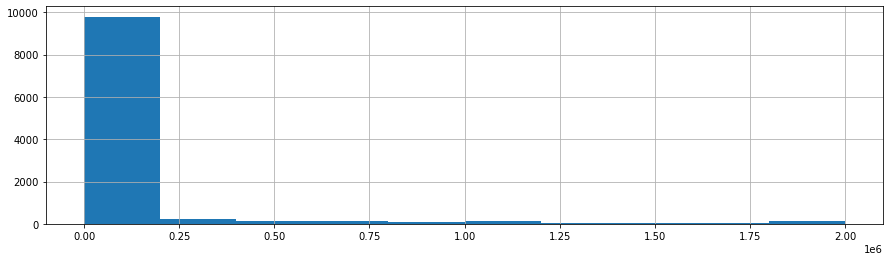

In [21]:
df["ConvertedComp"].hist(figsize=(15,4))

In [22]:
df['NormalizedAnnualCompensation'].median()

100000.0

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
